# 1. Load a dataset

In [ ]:
# read csv in ggdrive

import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/AjStephan/curcumin/main/PubChem_compound_list.csv')
data.head()

,cmpdname,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,isosmiles,exactmass,monoisotopicmass,xlogp
0,1-Aminopropan-2-ol,75.11,46.2,5,2,2,1,CC(CN)O,75.0684,75.0684,-1.0
1,"1-Chloro-2,4-dinitrobenzene",202.55,91.6,13,0,4,0,C1=CC(=C(C=C1[N+](=O)[O-])[N+](=O)[O-])Cl,201.9780,201.9780,2.3
2,"1,2-Dichloroethane",98.96,0.0,4,0,0,1,C(CCl)Cl,97.9690,97.9690,1.5
3,"1,2,4-Trichlorobenzene",181.40,0.0,9,0,0,0,C1=CC(=C(C=C1Cl)Cl)Cl,179.9300,179.9300,4.0
4,"2,3-Dihydroxybenzoic acid",154.12,77.8,11,3,4,1,C1=CC(=C(C(=C1)O)O)C(=O)O,154.0270,154.0270,1.2


# 2. Clean the data

In [ ]:
# to see missing values
data.isnull().sum()

cmpdname              0
mw                    0
polararea             0
heavycnt              0
hbonddonor            0
hbondacc              0
rotbonds              0
isosmiles             0
exactmass             0
monoisotopicmass      0
xlogp               341
dtype: int64

In [ ]:
numerical_data = data.drop(['cmpdname', 'isosmiles'],axis =1)

In [ ]:
data_no_mv = numerical_data.dropna(axis=0)

In [ ]:
data_no_mv.isnull().sum()

mw                  0
polararea           0
heavycnt            0
hbonddonor          0
hbondacc            0
rotbonds            0
exactmass           0
monoisotopicmass    0
xlogp               0
dtype: int64

In [ ]:
data_no_mv.describe(include='all')

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp
count,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000,21697.000000
mean,692.712814,75.663915,49.295525,0.619901,5.295571,35.531963,692.175940,692.152925,14.961718
std,340.893131,44.287087,24.773641,1.659651,2.621649,24.298595,340.675525,340.692233,10.438526
min,12.011000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,12.000000,-21.400000
25%,302.400000,61.800000,21.000000,0.000000,5.000000,5.000000,302.188000,302.188000,3.100000
50%,883.400000,78.900000,63.000000,0.000000,6.000000,50.000000,882.768000,882.768000,20.200000
75%,955.600000,78.900000,69.000000,0.000000,6.000000,55.000000,954.898000,954.898000,23.200000
max,1793.100000,873.000000,125.000000,29.000000,52.000000,74.000000,1790.560000,1790.560000,34.900000


In [ ]:
data_no_mv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21697 entries, 0 to 22037
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mw                21697 non-null  float64
 1   polararea         21697 non-null  float64
 2   heavycnt          21697 non-null  int64  
 3   hbonddonor        21697 non-null  int64  
 4   hbondacc          21697 non-null  int64  
 5   rotbonds          21697 non-null  int64  
 6   exactmass         21697 non-null  float64
 7   monoisotopicmass  21697 non-null  float64
 8   xlogp             21697 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.7 MB


In [ ]:
# remove categorcal features
#X = X.select_dtypes(exclude=['object'])
#X.info()

In [ ]:
data_no_mv.columns

Index(['mw', 'polararea', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds',
       'exactmass', 'monoisotopicmass', 'xlogp'],
      dtype='object')

In [ ]:
cols = ['xlogp', 'polararea', 'heavycnt', 'hbonddonor', 'hbondacc', 'rotbonds',
       'exactmass', 'monoisotopicmass', 'mw']

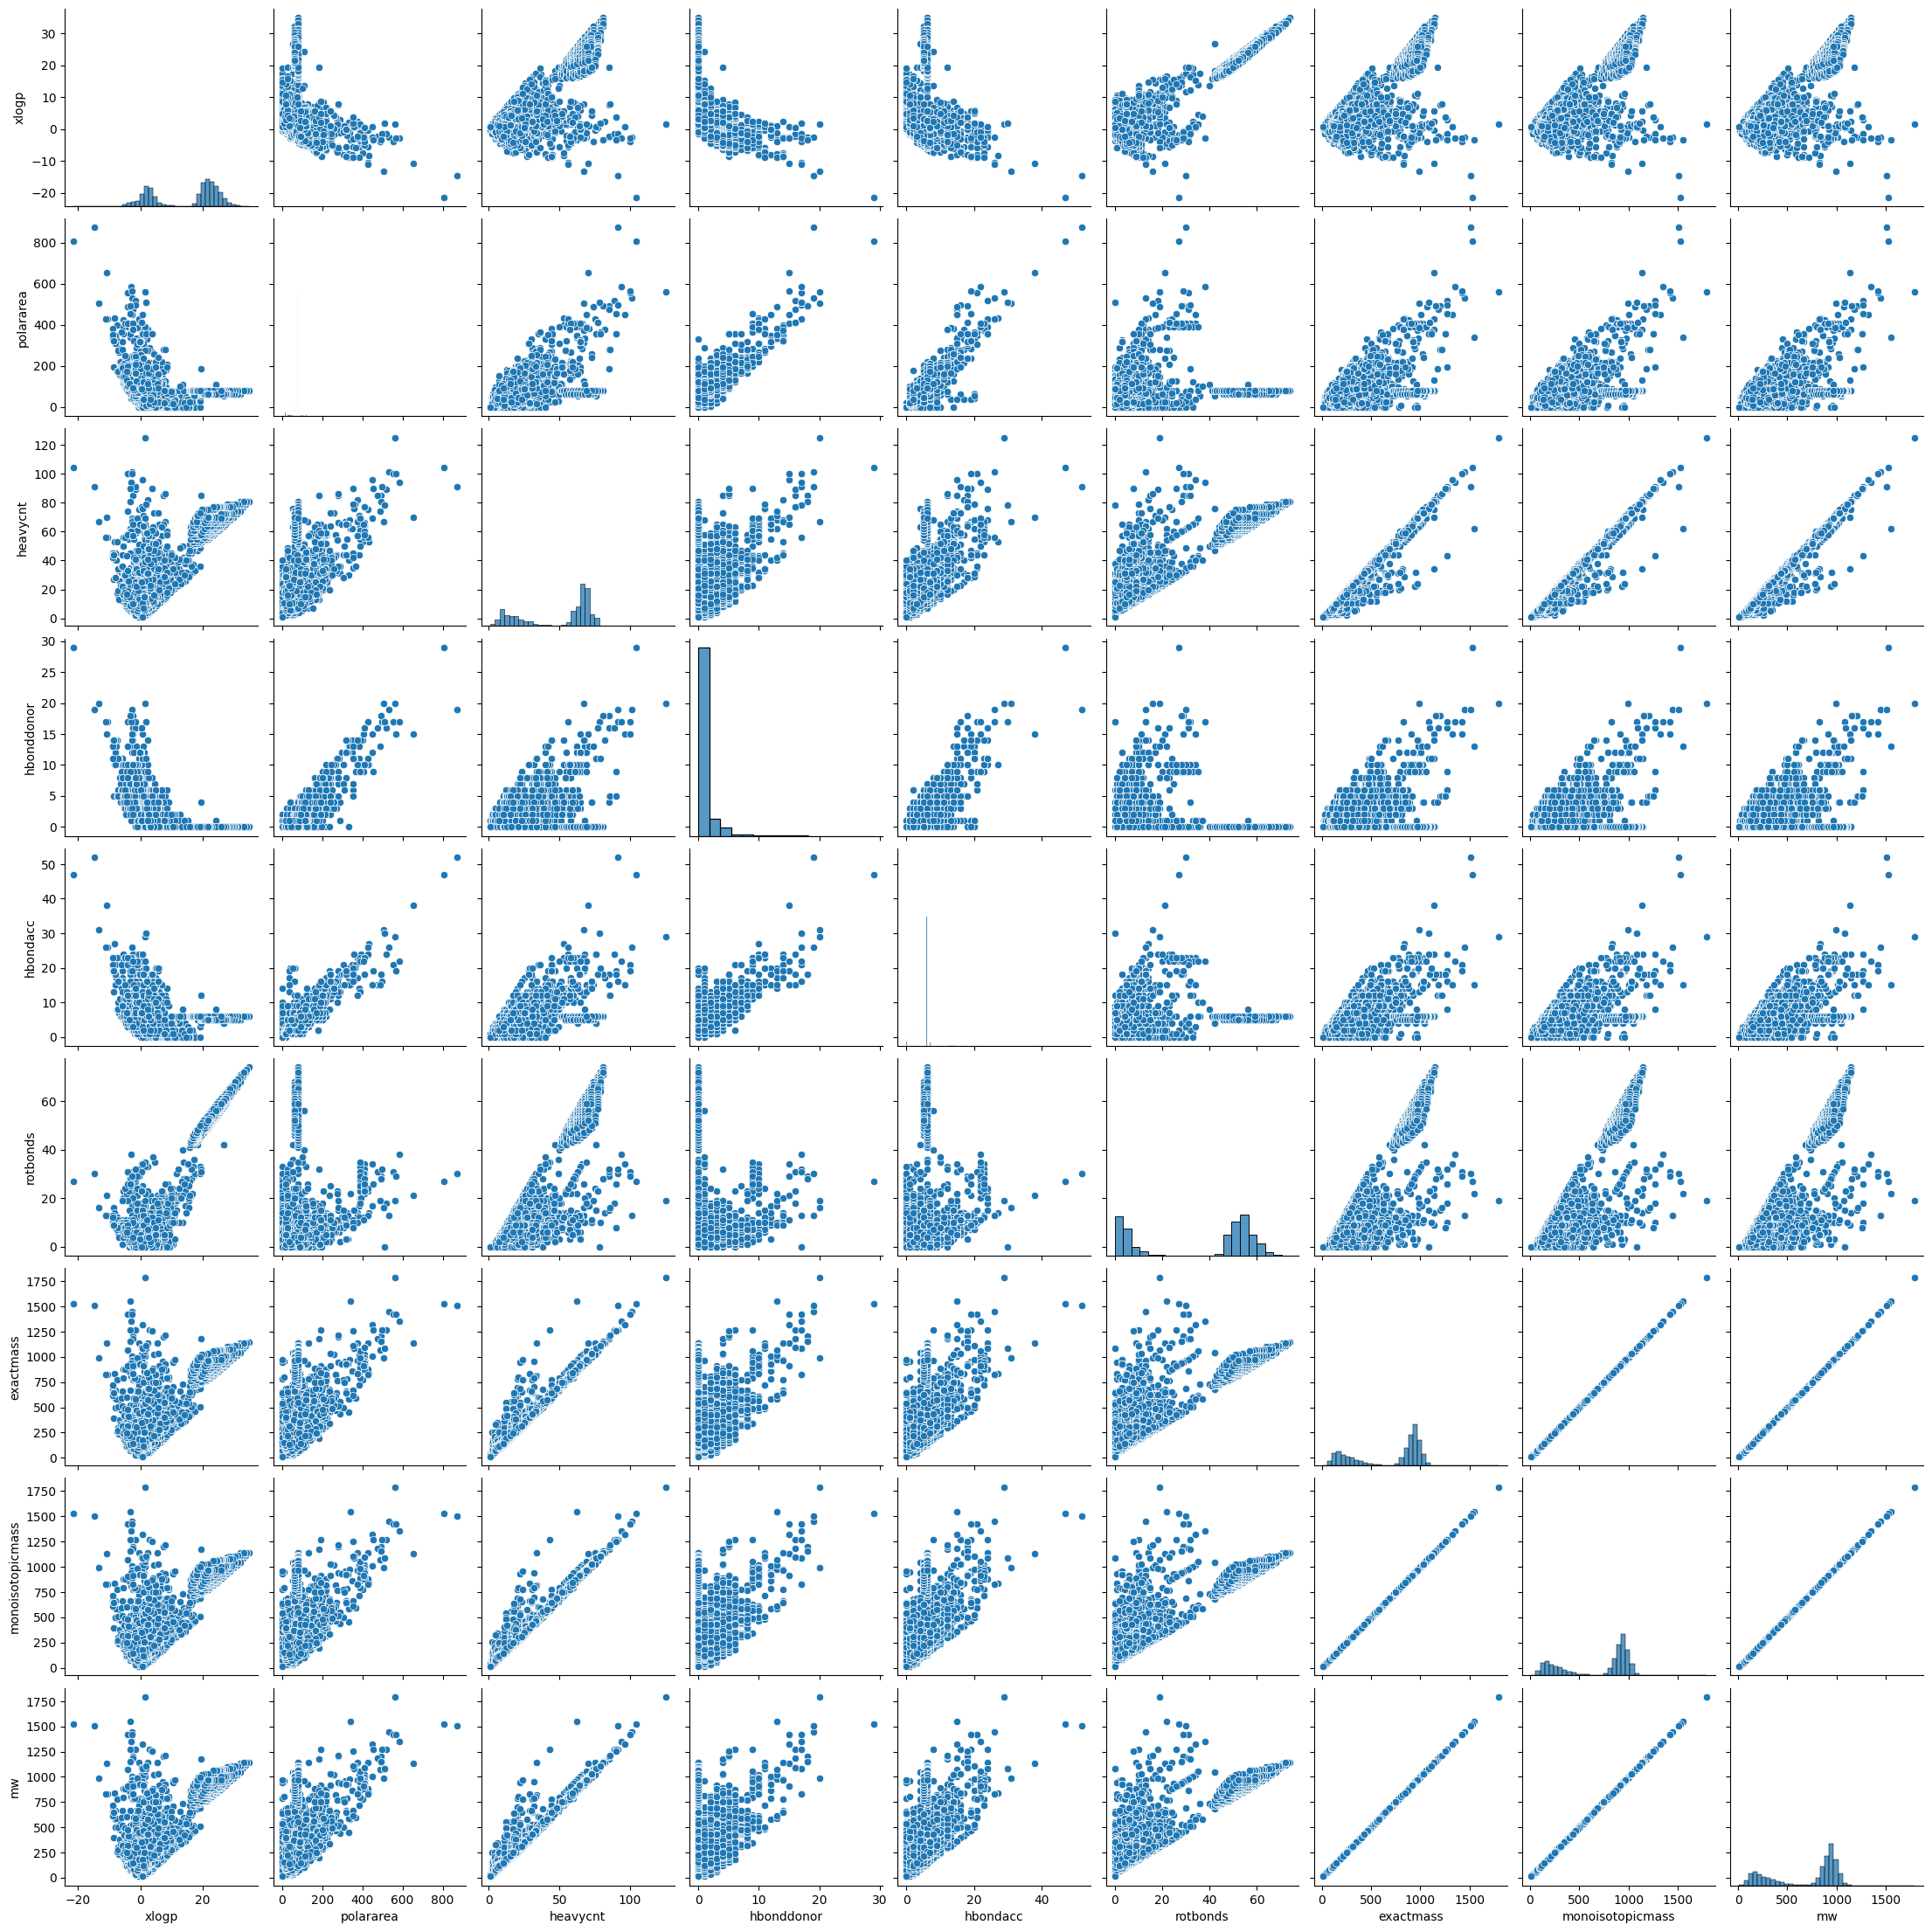

In [ ]:
import seaborn as sns

sns.pairplot(data_no_mv[cols])

In [ ]:
data_no_mv.corr()

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp
mw,1.000000,0.308500,0.997435,-0.262584,0.552616,0.949340,1.000000,1.000000,0.919551
polararea,0.308500,1.000000,0.298413,0.740235,0.888785,0.097491,0.308558,0.308631,-0.032019
heavycnt,0.997435,0.298413,1.000000,-0.271199,0.543949,0.952388,0.997443,0.997482,0.922000
hbonddonor,-0.262584,0.740235,-0.271199,1.000000,0.489584,-0.441135,-0.262522,-0.262493,-0.542695
hbondacc,0.552616,0.888785,0.543949,0.489584,1.000000,0.345328,0.552668,0.552746,0.240429
rotbonds,0.949340,0.097491,0.952388,-0.441135,0.345328,1.000000,0.949346,0.949394,0.979181
exactmass,1.000000,0.308558,0.997443,-0.262522,0.552668,0.949346,1.000000,1.000000,0.919538
monoisotopicmass,1.000000,0.308631,0.997482,-0.262493,0.552746,0.949394,1.000000,1.000000,0.919555
xlogp,0.919551,-0.032019,0.922000,-0.542695,0.240429,0.979181,0.919538,0.919555,1.000000


#3. Plot correlation matrix

In [ ]:

df_new = data.drop(['cmpdname','isosmiles','xlogp','exactmass', 'monoisotopicmass'],axis=1)
df_new


,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds
0,75.11,46.2,5,2,2,1
1,202.55,91.6,13,0,4,0
2,98.96,0.0,4,0,0,1
3,181.40,0.0,9,0,0,0
4,154.12,77.8,11,3,4,1
...,...,...,...,...,...,...
22033,843.10,195.0,59,4,16,11
22034,507.50,152.0,34,2,10,10
22035,432.50,116.0,31,1,8,7
22036,749.90,194.0,52,2,10,8


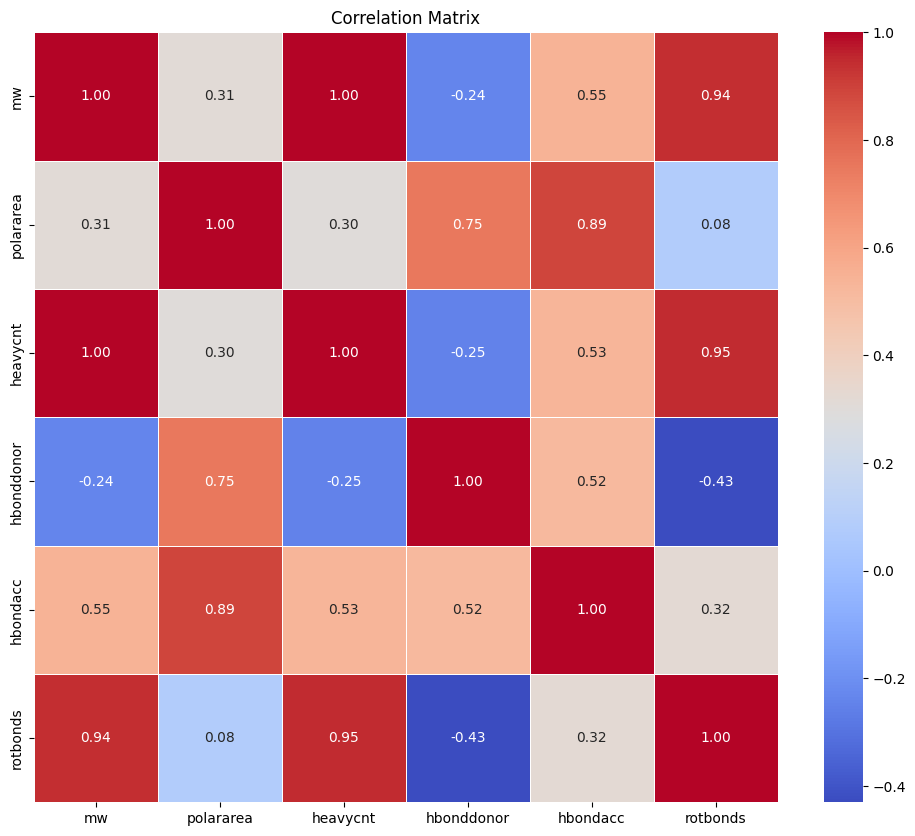

In [ ]:
# Compute the correlation matrix
import matplotlib.pyplot as plt

correlation_matrix = df_new.corr()

# Create the correlation matrix plot
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

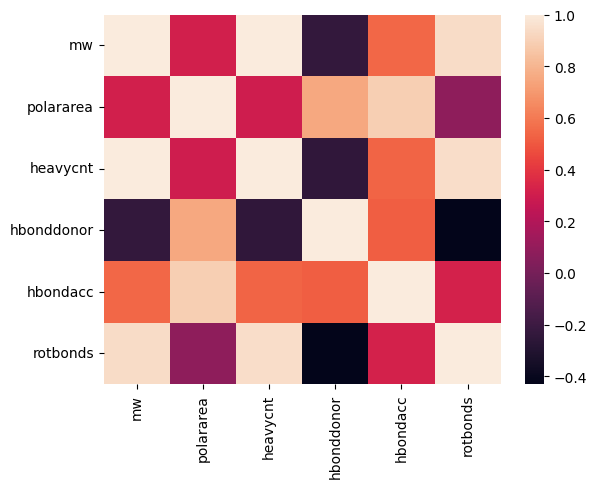

In [ ]:
import seaborn as sns

sns.heatmap(df_new.corr());

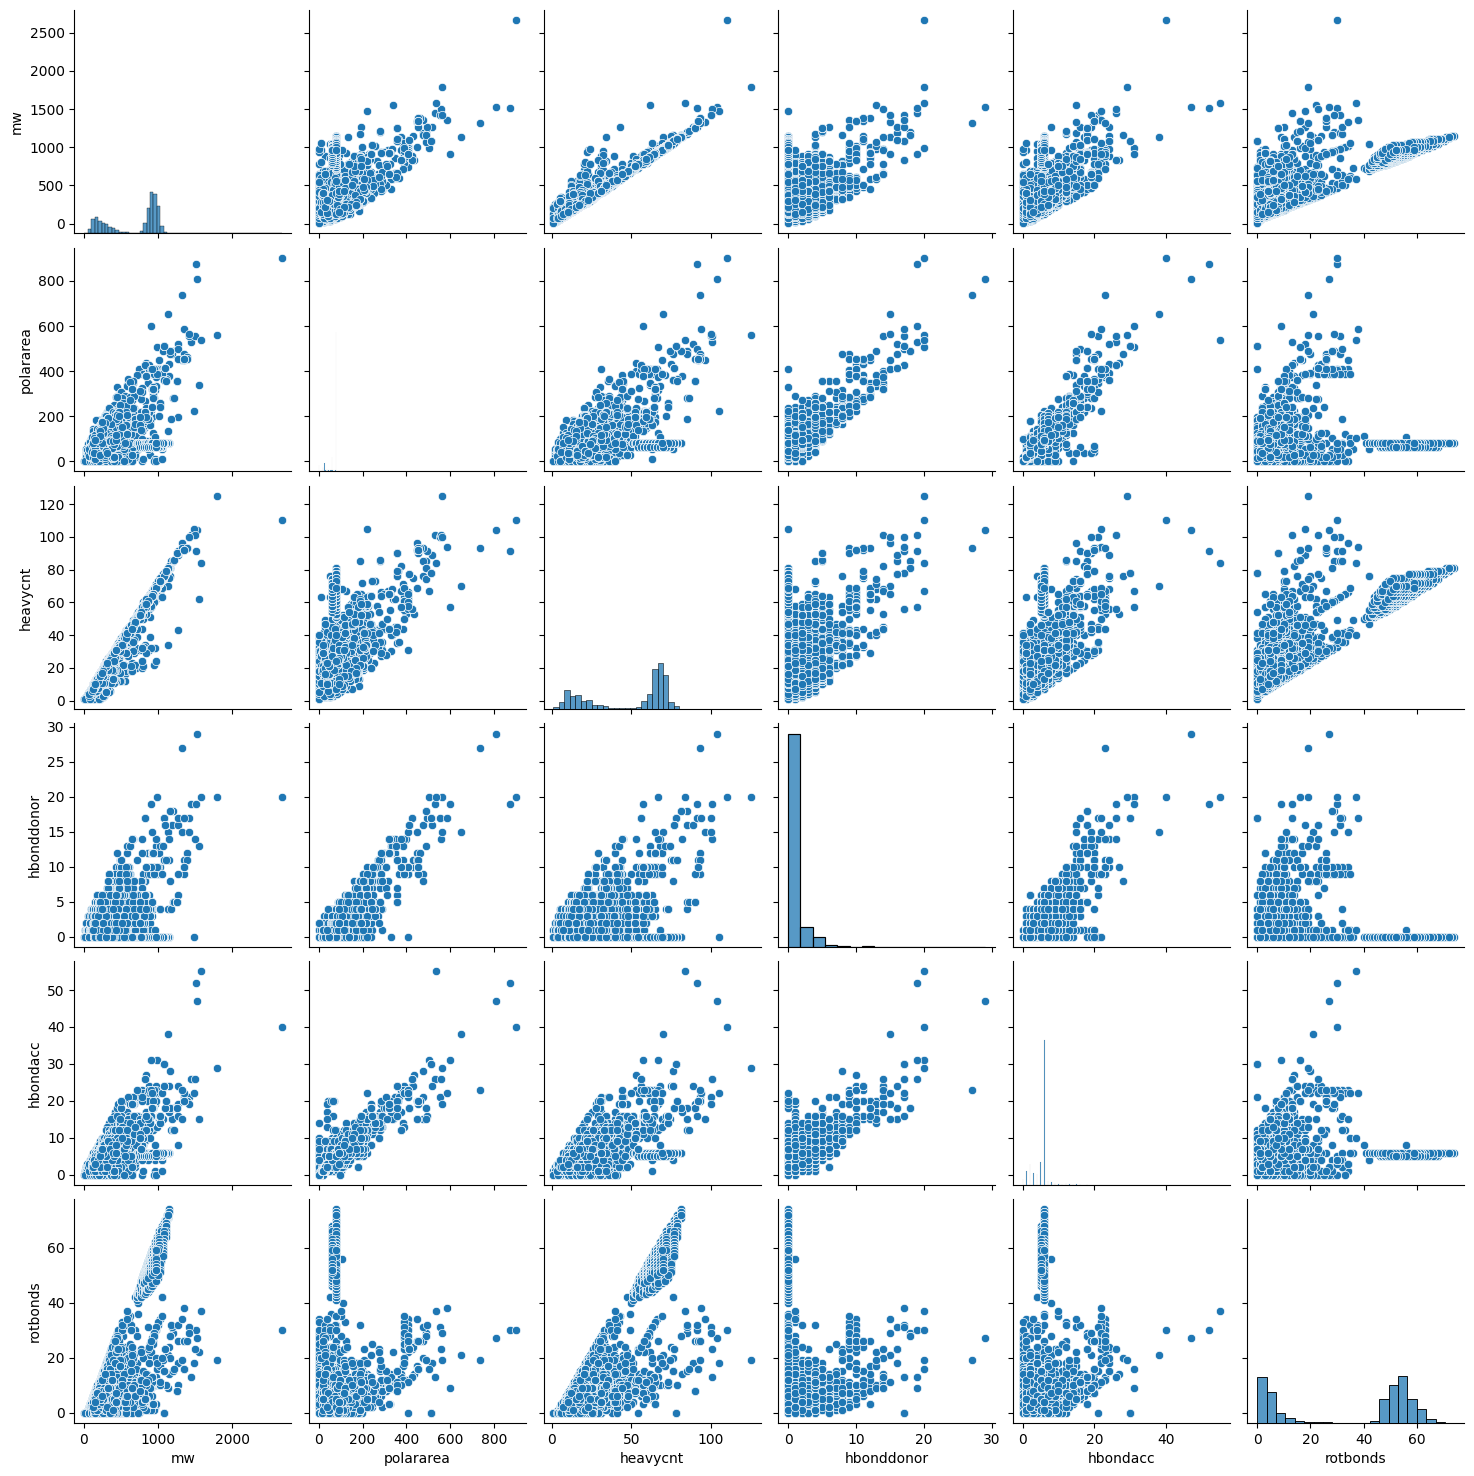

In [ ]:
sns.pairplot(df_new);

# 4. Run the regression

In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create a PolynomialFeatures transformer
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

# Transform the original features to include polynomial, interaction, and ratio terms
X_poly = poly.fit_transform(data_no_mv)

# Get the feature names
feature_names = poly.get_feature_names_out(input_features=list(data_no_mv.columns))
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)
X_poly_df

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp,mw^2,...,rotbonds^2,rotbonds exactmass,rotbonds monoisotopicmass,rotbonds xlogp,exactmass^2,exactmass monoisotopicmass,exactmass xlogp,monoisotopicmass^2,monoisotopicmass xlogp,xlogp^2
0,75.11,46.2,5.0,2.0,2.0,1.0,75.0684,75.0684,-1.0,5.641512e+03,...,1.0,75.0684,75.0684,-1.0,5.635265e+03,5.635265e+03,-75.0684,5.635265e+03,-75.0684,1.00
1,202.55,91.6,13.0,0.0,4.0,0.0,201.9780,201.9780,2.3,4.102650e+04,...,0.0,0.0000,0.0000,0.0,4.079511e+04,4.079511e+04,464.5494,4.079511e+04,464.5494,5.29
2,98.96,0.0,4.0,0.0,0.0,1.0,97.9690,97.9690,1.5,9.793082e+03,...,1.0,97.9690,97.9690,1.5,9.597925e+03,9.597925e+03,146.9535,9.597925e+03,146.9535,2.25
3,181.40,0.0,9.0,0.0,0.0,0.0,179.9300,179.9300,4.0,3.290596e+04,...,0.0,0.0000,0.0000,0.0,3.237480e+04,3.237480e+04,719.7200,3.237480e+04,719.7200,16.00
4,154.12,77.8,11.0,3.0,4.0,1.0,154.0270,154.0270,1.2,2.375297e+04,...,1.0,154.0270,154.0270,1.2,2.372432e+04,2.372432e+04,184.8324,2.372432e+04,184.8324,1.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21692,1030.30,242.0,73.0,4.0,16.0,11.0,1029.6000,1029.6000,5.6,1.061518e+06,...,121.0,11325.6000,11325.6000,61.6,1.060076e+06,1.060076e+06,5765.7600,1.060076e+06,5765.7600,31.36
21693,843.10,195.0,59.0,4.0,16.0,11.0,842.5140,842.5140,2.1,7.108176e+05,...,121.0,9267.6540,9267.6540,23.1,7.098298e+05,7.098298e+05,1769.2794,7.098298e+05,1769.2794,4.41
21694,432.50,116.0,31.0,1.0,8.0,7.0,432.1780,432.1780,2.3,1.870562e+05,...,49.0,3025.2460,3025.2460,16.1,1.867778e+05,1.867778e+05,994.0094,1.867778e+05,994.0094,5.29
21695,749.90,194.0,52.0,2.0,10.0,8.0,749.2920,749.2920,4.8,5.623500e+05,...,64.0,5994.3360,5994.3360,38.4,5.614385e+05,5.614385e+05,3596.6016,5.614385e+05,3596.6016,23.04


In [ ]:
# Scaling
from sklearn.preprocessing import StandardScaler #Z-score normalization
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly_df)
X_poly_scaled_df = pd.DataFrame(X_poly_scaled, columns=list(X_poly_df.columns))

In [ ]:
X_poly_scaled_df

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp,mw^2,...,rotbonds^2,rotbonds exactmass,rotbonds monoisotopicmass,rotbonds xlogp,exactmass^2,exactmass monoisotopicmass,exactmass xlogp,monoisotopicmass^2,monoisotopicmass xlogp,xlogp^2
0,-1.811761,-0.665309,-1.788052,0.831579,-1.257089,-1.421183,-1.811465,-1.811309,-1.529151,-1.476901,...,-1.272077,-1.324117,-1.324113,-1.243433,-1.476799,-1.476750,-1.305276,-1.476701,-1.305250,-1.238448
1,-1.437911,0.359844,-1.465120,-0.373522,-0.494193,-1.462339,-1.438933,-1.438795,-1.213007,-1.388386,...,-1.272764,-1.327187,-1.327183,-1.241841,-1.388722,-1.388674,-1.253868,-1.388626,-1.253842,-1.222436
2,-1.741797,-1.708526,-1.828418,-0.373522,-2.019986,-1.421183,-1.744242,-1.744089,-1.289648,-1.466516,...,-1.272077,-1.323180,-1.323176,-1.239453,-1.466873,-1.466824,-1.284124,-1.466775,-1.284098,-1.233782
3,-1.499956,-1.708526,-1.626586,-0.373522,-2.019986,-1.462339,-1.503653,-1.503512,-1.050145,-1.408699,...,-1.272764,-1.327187,-1.327183,-1.241841,-1.409815,-1.409767,-1.229558,-1.409719,-1.229533,-1.182462
4,-1.579983,0.048234,-1.545853,1.434129,-0.494193,-1.421183,-1.579689,-1.579544,-1.318389,-1.431595,...,-1.272077,-1.320887,-1.320884,-1.239930,-1.431485,-1.431437,-1.280516,-1.431388,-1.280490,-1.236806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21692,0.990325,3.755946,0.956865,2.036680,4.083185,-1.009627,0.990479,0.990498,-0.896864,1.164347,...,-1.189649,-0.864014,-0.864011,-1.143763,1.164638,1.164645,-0.748831,1.164652,-0.748811,-1.125132
21693,0.441167,2.694664,0.391735,2.036680,4.083185,-1.009627,0.441304,0.441350,-1.232168,0.287079,...,-1.189649,-0.948176,-0.948173,-1.205062,0.287250,0.287271,-1.129568,0.287292,-1.129544,-1.225720
21694,-0.763344,0.910808,-0.738525,0.229029,1.031600,-1.174250,-0.763201,-0.763096,-1.213007,-1.023097,...,-1.239106,-1.203466,-1.203462,-1.216207,-1.023027,-1.022985,-1.203427,-1.022943,-1.203402,-1.222436
21695,0.167761,2.672084,0.109170,0.831579,1.794496,-1.133094,0.167659,0.167719,-0.973505,-0.084309,...,-1.228802,-1.082042,-1.082038,-1.180702,-0.084479,-0.084452,-0.955483,-0.084425,-0.955461,-1.156186


In [ ]:
y = data_no_mv['xlogp']
X = data_no_mv.drop('xlogp', axis = 1)

In [ ]:
# modeling
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV
from sklearn.metrics import r2_score

# Create a linear regression model
model = LinearRegression()

# Create an RFECV object with scoring as R2
rfecv = RFECV(estimator=model, cv=10, scoring='r2')  # You can adjust the number of cross-validation folds as needed

# Fit the RFECV model to the scaled data
rfecv.fit(X_poly_scaled_df, y)

# Determine the selected features and their names
selected_features_indices = np.where(rfecv.support_)[0]
selected_feature_names = X_poly_scaled_df.columns[selected_features_indices]
X_selected = X_poly_scaled_df.iloc[:, selected_features_indices]

# Build your final model
final_model = LinearRegression()
final_model.fit(X_selected, y)
y_pred_selected = final_model.predict(X_selected)

# find coeff
feature_importances = final_model.coef_
# Pair the feature names with their respective coefficients
feature_importance_dict = dict(zip(selected_feature_names, feature_importances))

In [ ]:
print("Selected Features:")
print(selected_feature_names)

Selected Features:
Index(['xlogp'], dtype='object')


In [ ]:
# Print or analyze the feature importances
for feature, importance in feature_importance_dict.items():
    print(f"{feature}: {importance:.4f}")

xlogp: 10.4383


# 5. Display the evaluation metrics

Mean Squared Error (MSE): 4.021585738477283
Mean Absolute Error (MAE): 1.5343101634490994
R-squared (R2) Score: 0.962706831241023
Explained Variance Score: 0.9628043468894069



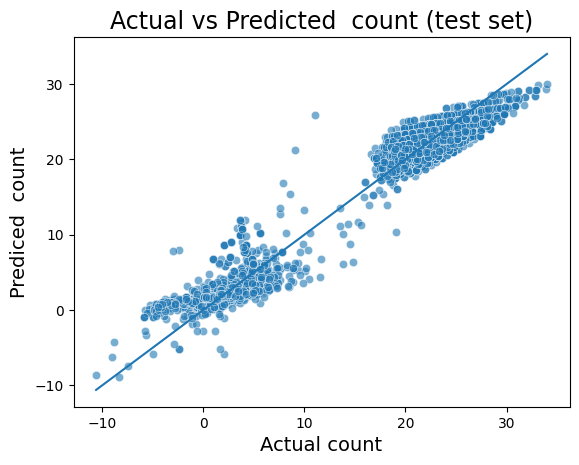

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns


# Define the models
models = [
    ('Polynomial Regression', PolynomialFeatures(degree=2))
]

# Fit each model, make predictions, and evaluate
for model_name, regressor in models:
    if isinstance(regressor, PolynomialFeatures):
        # For Polynomial Regression, transform the features
        X_poly = regressor.fit_transform(X)
        regressor = SVR()  # Replace with your desired regression model for Polynomial Regression
    else:
        X_poly = X  # For other models, use the original features

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)


# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Menampilkan hasil metrik evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)
plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()




# 6. Default parameter

In [ ]:
poly_reg = PolynomialFeatures(degree=2)
default_poly_reg_params = poly_reg.get_params()

# Print the default hyperparameters
print("Default Hyperparameters for Polynomial Regression:")
print(default_poly_reg_params)

Default Hyperparameters for Polynomial Regression:
{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


#7. Feature selection ANOVA and Recursive Feature Elimination (RFE)

##ANOVA

In [ ]:
# ANOVA
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
data_no_mv.head()

,mw,polararea,heavycnt,hbonddonor,hbondacc,rotbonds,exactmass,monoisotopicmass,xlogp
0,75.11,46.2,5,2,2,1,75.0684,75.0684,-1.0
1,202.55,91.6,13,0,4,0,201.9780,201.9780,2.3
2,98.96,0.0,4,0,0,1,97.9690,97.9690,1.5
3,181.40,0.0,9,0,0,0,179.9300,179.9300,4.0
4,154.12,77.8,11,3,4,1,154.0270,154.0270,1.2


In [ ]:
model = ols('xlogp ~ polararea + heavycnt + hbonddonor + hbondacc + rotbonds', data=data).fit()
anova = sm.stats.anova_lm(model, typ=2)
anova

,sum_sq,df,F,PR(>F)
polararea,5503.341292,1.0,2576.489323,0.000000e+00
heavycnt,9115.426457,1.0,4267.552691,0.000000e+00
hbonddonor,408.779287,1.0,191.377458,2.431228e-43
hbondacc,1.660539,1.0,0.777412,3.779437e-01
rotbonds,54104.362396,1.0,25329.941329,0.000000e+00
Residual,46331.640074,21691.0,NaN,NaN


In ANOVA analysis, the most important or significant parameters are typically identified by the values of F and p (PR(>F)). The higher the F value and the lower the p value, the more significant the influence. In this case: The variables **rotbonds, heavycnt, and polararea** have high F values and very low p values, indicating that these three variables have a significant influence in explaining variability in the data. These values suggest that there is a significant difference between the tested groups for these variables.


In [ ]:
# Run the regression

data_new = data_no_mv.drop(['hbondacc', 'hbonddonor' ],axis =1)


In [ ]:
y_new = data_new['xlogp']
X_new = data_new.drop('xlogp', axis = 1)

Mean Squared Error (MSE): 3.9496673646817198
Mean Absolute Error (MAE): 1.5210938961476836
R-squared (R2) Score: 0.9633737482795354
Explained Variance Score: 0.9634503938449289



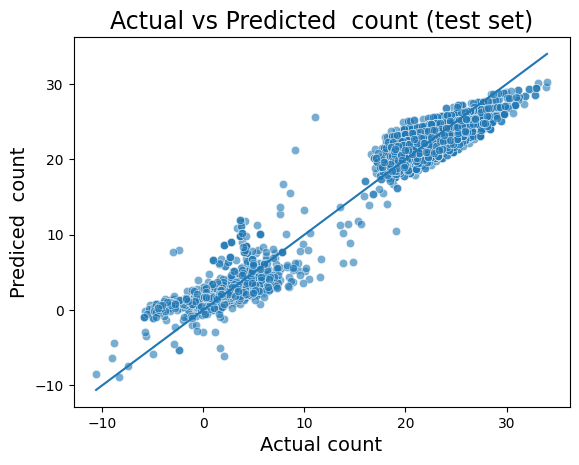

In [ ]:
# Define the models
models = [
    ('Polynomial Regression', PolynomialFeatures(degree=2))
]

# Fit each model, make predictions, and evaluate
for model_name, regressor in models:
    if isinstance(regressor, PolynomialFeatures):
        # For Polynomial Regression, transform the features
        X_poly = regressor.fit_transform(X_new)
        regressor = SVR()  # Replace with your desired regression model for Polynomial Regression
    else:
        X_poly = X_new  # For other models, use the original features

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y_new, test_size=0.2, random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)


# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_variance = explained_variance_score(y_test, y_pred)

# Displaying evaluation metric results
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print()

sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
sns.lineplot(x=y_test, y=y_test)
plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()